# ติดตั้ง library

In [ ]:
!pip install gymnasium -q

# Cliff walking environment

In [ ]:
import gymnasium as gym
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [ ]:
def initialize_q_table(state_space, action_space):
  Qtable = np.zeros((state_space, action_space))
  return Qtable

In [ ]:
def greedy_policy(Qtable, state):
  action = np.argmax(Qtable[state][:])

  return action

def epsilon_greedy_policy(Qtable, state, epsilon):
  random_num = np.random.rand(1)
  if random_num > epsilon:
    action = greedy_policy(Qtable, state)
  else:
    action = env.action_space.sample()

  return action

In [ ]:
def train(n_training_episodes,  env, Qtable,learning_rate = 0.5,gamma=0.95, epsilon=0.5):
  accumulated_reward = 0
  for episode in tqdm(range(n_training_episodes), desc='Epochs'):
    state, info = env.reset()
    terminated = False
    truncated = False
    rander_round = 20
    # repeat
    while True:
      action = epsilon_greedy_policy(Qtable, state, epsilon)
      new_state, reward, terminated, truncated, info = env.step(action)

      # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
      Qtable[state][action] = Qtable[state][action] + learning_rate * (reward + gamma * np.max(Qtable[new_state]) - Qtable[state][action])

      accumulated_reward += reward
      # Our next state is the new state
      state = new_state
      # rander
      if episode == n_training_episodes -2:#episode%rander_round == 0:
            display.clear_output(wait=True)
            single_frame = env.render()
            plt.imshow(single_frame)
            plt.show()
      # If terminated or truncated finish the episode
      if terminated or truncated:
        break

  print(f"reward: {accumulated_reward} at {episode} episodes")
  return Qtable

In [ ]:
env = gym.make("CliffWalking-v0", render_mode="rgb_array")
observation, info = env.reset()

state_space = env.observation_space.n

action_space = env.action_space.n

Qtable = initialize_q_table(state_space, action_space)

In [ ]:
# Training parameters
n_training_episodes = 200  # Total training episodes
learning_rate = 0.7          # Learning rate
# Environment parameters
gamma = 0.95                 # Discounting rate

# Exploration parameters
epsilon = 0.5


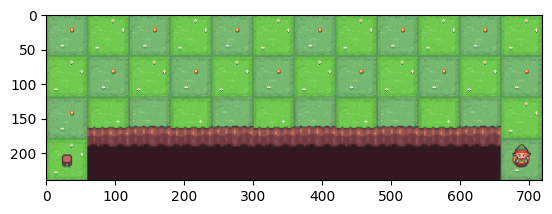

Epochs: 100%|██████████| 1200/1200 [00:05<00:00, 224.37it/s]

reward: -307739 at 1199 episodes


In [ ]:
#train(n_training_episodes,  env, Qtable,learning_rate = 0.5,gamma=0.95, epsilon=0.5)
Qtable_smart = train(1200, env, Qtable, 0.7, 0.95, 0.5)

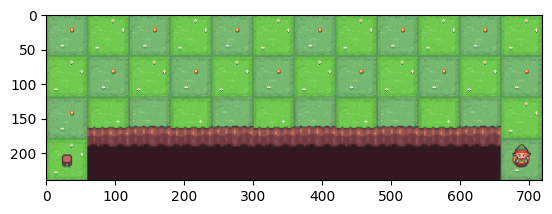

Epochs: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]

reward: -39 at 2 episodes


In [ ]:
train(3, env, Qtable_smart, learning_rate, gamma, epsilon = 0);

# Frozen lake environment

In [ ]:
env = gym.make("FrozenLake-v1", render_mode="rgb_array")
observation, info = env.reset()

state_space = env.observation_space.n

action_space = env.action_space.n

Qtable = initialize_q_table(state_space, action_space)

In [ ]:
# Training parameters
n_training_episodes = 12000  # Total training episodes
learning_rate = 0.2          # Learning rate
# Environment parameters
gamma = 0.95                 # Discounting rate

# Exploration parameters
epsilon = 0.70

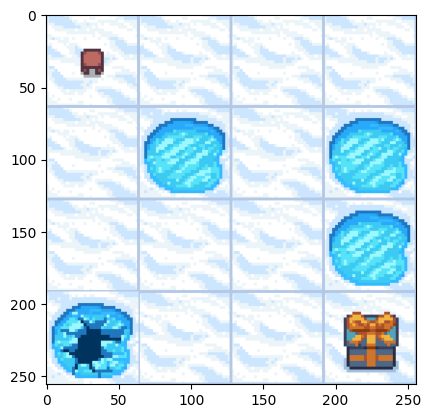

Epochs: 100%|██████████| 12000/12000 [00:06<00:00, 1958.27it/s]

reward: 402.0 at 11999 episodes


In [ ]:
Qtable_FrozenLake = train(n_training_episodes, env, Qtable, learning_rate, gamma, epsilon)

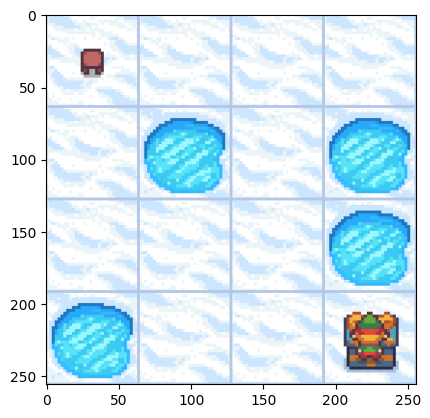

Epochs: 100%|██████████| 2/2 [00:03<00:00,  1.89s/it]

reward: 1.0 at 1 episodes


In [ ]:
train(2, env, Qtable_FrozenLake, learning_rate, gamma, epsilon = 0.6);#use Q table only not random

ตำแหน่ง 36


array([[[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 98, 166, 105],
        ...,
        [105, 182,  74],
        [105, 182,  74],
        [ 86, 170,  69]],

       ...,

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]]], dtype=uint8)
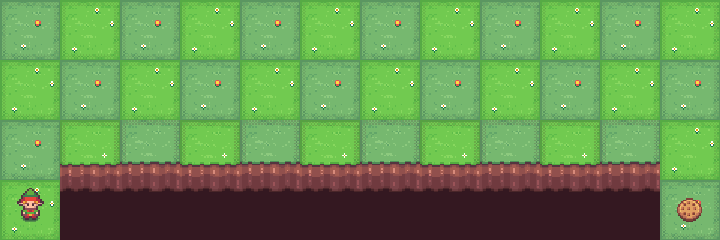

In [ ]:
#env = gym.make("FrozenLake-v1", render_mode="rgb_array")
env = gym.make("CliffWalking-v0", render_mode="rgb_array")
observation, info = env.reset()
print("ตำแหน่ง",observation)
env.render()

ตำแหน่ง 47


array([[[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 98, 166, 105],
        ...,
        [105, 182,  74],
        [105, 182,  74],
        [ 86, 170,  69]],

       ...,

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]]], dtype=uint8)
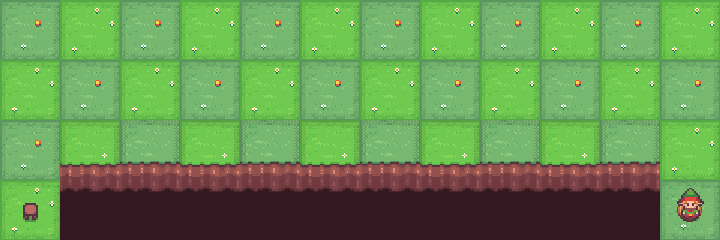

In [ ]:
'''0: Move up

1: Move right

2: Move down

3: Move left'''
observation=env.step(2)[0] #0:<- ,1=v,2:->,3: ^
print("ตำแหน่ง",observation)
env.render()